In [64]:
#!pip install matplotlib
#!pip install seaborn

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


<div dir=rtl >
<h1>خوشه‌بندی</h1>
خوشه‌بندی به دسته‌بندی اشیا‌ به گونه‌ای گفته می‌شود که اشیا موجود در هر دسته نسبت به دیگر اشیا سایر دسته‌ها شباهت بیشتری داشته باشند.

<img src="https://drive.google.com/uc?id=1RDHbS2bWOKM4WAq7sGMhrVLLBxegNer0"></img>

چند مورد از کاربردهای رایج این الگوریتم‌ها در زیر اشاره شده است:
- فشرده‌سازی
- سامانه‌های توصیه‌گر (recommender systemss)
- دسته‌بندی بر اساس شباهت
  - دسته‌بندی صفحات شبیه بهم وب (برای مثال گوگل نیوز)
  - دسته‌بندی مشتریان بر اساس سلیقه خرید برای ارائه خدمت بهتر
</div>


<div dir=rtl>
<h2>داده‌های نمونه</h2>
برای شروع کار، داده‌های تصادفی را تولید می‌کنیم.

<font color='Red'> توجه: از تغییردادن متغییرها اجتناب کنید.  </font>
</div>

In [65]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
print(X.shape)

(100, 2)


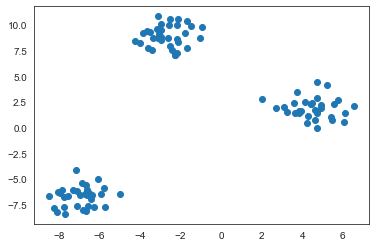

In [66]:
plt.scatter(X[:, 0], X[:, 1])

<div dir=rtl>
<h2>الگوریتم k-means</h2>
<div>
یکی از الگوریتم‌های ساده و نسبتاً پرکاربرد برای خوشه‌بندی الگوریتم k-means است. هدف ما در این تمرین پیاده‌سازی این الگوریتم نیست و فقط آَشنایی با آن است. برای استفاده از این الگوریتم و الگوریتم‌های دیگر خوشه‌بندی می‌توانید ماژول‌های <code>sklearn.cluster</code> را مشاهده کنید.</div>
</div>

In [67]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)

<div dir=rtl>
خط کد بالا، این الگوریتم را پیاده‌سازی می‌کند. درآن <code>n_clusters</code> تعداد خوشه‌ها را مشخص می‌کند.

<font color='Green'> پرسش: ما می‌توانیم برچسب‌های خوشه‌ی هر داده را در این الگوریتم داشته باشیم. قطعه کدی بنویسید که برچسب‌های هر کدام از داده‌ها را پرینت کند. این برچسب‌ها را در متغیر <code>labels</code> قرار دهید.  </font>
</div>

In [68]:
labels = kmeans.fit(X).labels_
print(labels)

[1 0 2 0 1 0 2 0 0 2 2 1 1 2 2 1 1 2 1 1 2 1 1 2 2 2 0 1 1 1 1 0 0 1 2 2 2
 2 0 0 1 2 0 2 2 0 1 1 1 0 0 0 2 1 1 1 2 2 0 2 1 0 1 0 1 1 0 1 0 0 0 1 1 2
 0 1 0 1 0 0 2 0 2 1 2 2 2 0 2 0 0 0 2 0 2 2 2 0 1 2]


<div dir=rtl>
<h2>مشاهده نتیجه</h2>
ما می‌توانیم نتیجه‌ی خوشه‌بندی را با قطعه کد زیر مشاهده کنیم. در این قطعه کد می‌توانیم پالت رنگی برای رسم را موارد متفاوتی قرار دهیم. در این کد ما از پالت رنگ‌های سرد استفاده کردیم.

</dir>

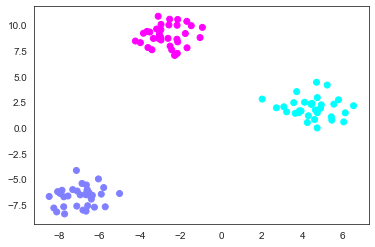

In [69]:
plt.scatter(X[:, 0], X[:, 1], cmap=plt.cm.cool, c=labels)

<div dir=rtl>
<h2>تعیین تعداد خوشه‌ها</h2>
یکی از ضعف‌های الگوریتم k-means مشخص کردن تعداد خوشه‌هاست. در این مثال با مشاهده شکل توانسیم که تعداد خوشه‌ها را حدس بزنیم. اما در دنیای واقعی این کار قابل انجام نیست. یکی از راه‌ها کاهش بعد با استفاده از PCA است که در تمرین اول مشاهده کردید. روش دیگر استفاده از روش آرنج (elbow) است.


<font color='Green'> پرسش: اگر تعداد خوشه‌ها را برای داده‌های قبل 2 در نظر بگیریم، نمودار قبلی را برای این حالت رسم کنید. دقت کنید که <code>random_state=42</code> باشد. </font>
</div>

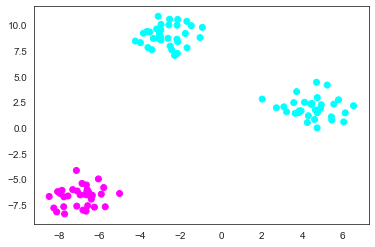

In [70]:
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit(X).labels_
plt.scatter(X[:, 0], X[:, 1], cmap=plt.cm.cool, c=labels)

<div dir=rtl>
<h2>روش آرنج (elbow)</h2>
شما در درس با روش آرنج آشنا شده‌اید.

<font color='Green'> پرسش: روش آرنج را برای مقدار خوشه‌های 1 تا 10 حساب کنید و نمودار میزان تابع هزینه را برای هر خوشه رسم کنید. برای هر مرحله <code>random_state</code> را برابر با صفر در نظر بگیرید.  
</div>

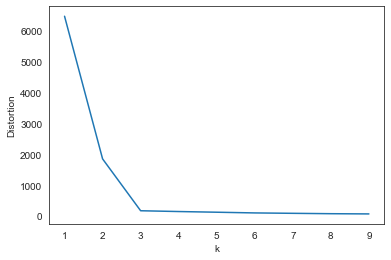

In [71]:
# your code here
i = list()
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=0).fit(X)
    kmeanModel.fit(X)
    i.append(kmeanModel.inertia_)
plt.plot(K, i)
plt.xlabel('k')
plt.ylabel('Distortion')
plt.show()

<div dir=rtl>
<h2>خوشه‌بندی‌های پیچیده‌تر</h2>
همیشه خوشه‌بندی‌ها به این صورت نیست. همچنین k-means تنها الگوریتم خوشه‌بندی نیست. در زیر توزیع‌های مختلف داده‌های مختلف با روش k-means رسم شده‌است.

 شما می‌توانید مشاهده کنید که در کدام حالت این الگوریتم خوب عمل می‌کند.

تمامی این‌ کدها از سند مطالب <code>sklearn</code> استفاده شده است. شما می‌توانید این اسناد را در <a href="https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html"> اینجا</a> مشاهده کنید.


همچنین می‌توانید الگوریتم‌های دیگر را نیز در اسناد <code>sklearn</code> مشاهده کنید.
</div>

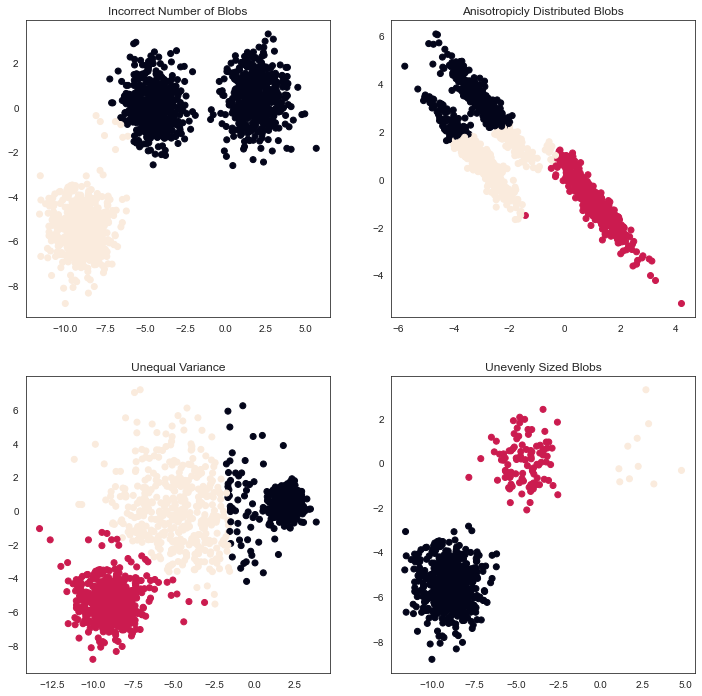

In [72]:
sns.set_style('white')

plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")

# Different variance
X_varied, y_varied = make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")

plt.show()


<div dir=rtl> 

<font color='Green'> پرسش: خوشه‌بندی اعداد

مجموعه داده‌ی digits در زیر لود شده است. الگوریتم k-means را برای این مجموعه داده پیاده کنید. تعداد خوشه‌ها را برابر با 10 در نظر بگیرید. مراکز خوشه‌ها را نمایش دهید. برای این کار هر 64 عدد را به ماتریس 8 در 8 تبدیل کنید. پس از آن از plt.imshow استفاده کنید. آیا می‌توان با مرکز تشخیص داد برای کدام دسته از اعداد است؟
</font>  
<font color='Red'>
پاسخ : همانطور که مشاهده می‌شود مقدار وضوح عکس‌ها کمی کم می‌باشد اما اعداد قابل تشخیص هستند و می‌توانیم مرکز خوشه را به جای خوشه‌ها برای کاهش ابعاد استفاده کنیم و نتایج قابل قبول خواهند بود.
</font> 
    
<font color='Green'> پرسش: استفاده از Isomap

این الگوریتم نیز مانند PCA کار کاهش بعد را انجام میدهد. با استفاده از این الگوریتم (موجود در <code>sklean.manifold.Isomap</code>) داده‌ها را به داده‌هایی با بعد 2 تبدیل کنید. پس از آن دو نمودار رسم کنید. نمودار اول رنگ هر داده را با لیبل‌هایی که الگوریتم kmeans تولید کرده است تعیین کنید و نمودار دوم رنگ هر داده برابر با digits.target که همان لیبل کلاس است، فرض بگیرید. چه چیزی متوجه می‌شوید؟
<font color='Red'>
    پاسخ : مشاهده می‌کنیم که در واقع لیبل‌هایی که با استفاده از 
    Isomap تولید شده‌اند با لیبل‌های actual متفاوت هستند در نتیجه دسته‌بندی خوبی صورت نگرفته است.
    باید توجه داشته باشیم زمانی که داده‌های ما جداپذیر خطی هستند kmeans به خوبی عمل می‌کند اما زمانی که جداپذیر خطی نیستند و خوشه‌ها طوری هستند که یکی دیگری را شامل می‌شود به خوبی عمل نمی‌کند.
</font> 
</font>  
</div>

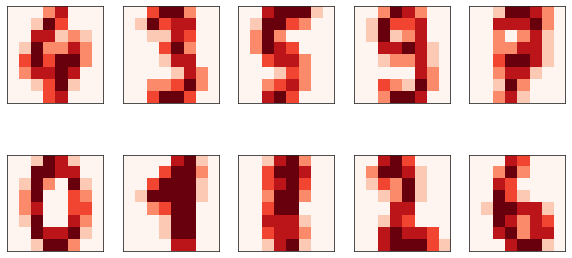

In [73]:
from sklearn.datasets import load_digits
d = load_digits()
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(d.data)
fig, ax = plt.subplots(2, 5, figsize=(10, 5))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.get_cmap('Reds', 6))

/usr/local/Cellar/jupyterlab/3.3.2/libexec/lib/python3.9/site-packages/sklearn/manifold/_isomap.py:348: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/Cellar/jupyterlab/3.3.2/libexec/lib/python3.9/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


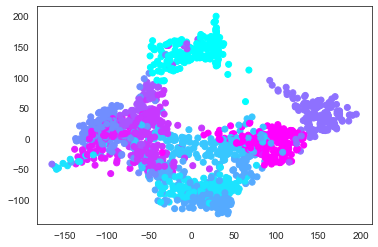

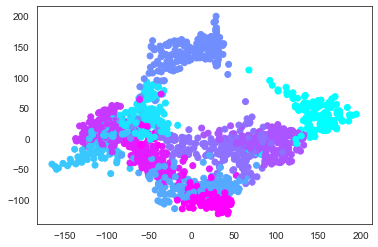

In [74]:
from sklearn.manifold import Isomap
from sklearn.preprocessing import scale

e = Isomap(n_components=2)
X = e.fit_transform(d.data)
plt.scatter(X[:, 0], X[:, 1], cmap=plt.cm.cool, c=kmeans.labels_)
fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], cmap=plt.cm.cool, c=d.target)

<div dir=rtl> 

<font color='Green'> پرسش: کاهش حجم عکس با kmeans
</font>

<font color='Green'>
یکی از کاربردهای این الگوریتم کاهش حجم است. در تصویری که همراه با تمرین قرار داده شده است. شما تصویر یک پرنده را میبینید. در قطعه کد زیر (سومین قطعه کد) شما توزیع رنگی استفاده شده در این عکس را مشاهده می‌کنید. حال کاری که شما باید کنید این است که این رنگ‌ها را به 4 خوشه تقسیم کنید و به جای هر رنگ از مرکز آن خوشه استفاده کنید. سپس تصویر را با رنگ‌های جدید ترسیم کنید.
</font>  

قطعه کد اول برای اتصال گوگل کولب به گوگل درایو شما است. در صورتی که از گوگل کولب استفاده نمیکنید، این قطعه کد را اجرا نکنید. قطعه کد دوم عکس را لود میکند. در ورودی تابع imread آدرس عکس را قرار دهید. اگر از گوگل کولب استفاده میکنید، باید ابتدا این عکس را در درایو خود آپلود کنید و آدرس آن را وارد کنید.
</div>

In [75]:
#from google.colab import drive

#drive.mount('/content/gdrive')

In [76]:
from matplotlib.pyplot import imread

img = imread('bird.jpg')


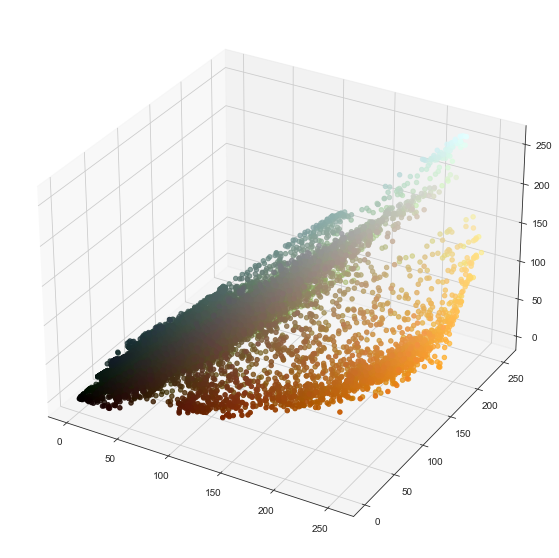

In [77]:

fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(111, projection='3d')

A = img.reshape((img.shape[0] *img.shape[1], 3))

ax.scatter3D(A[:, 0], A[:, 1], A[:, 2], color=A[:]/255.0)

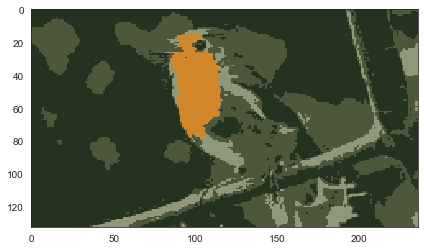

In [78]:
from skimage import io
rows = img.shape[0]
columns = img.shape[1]
image = img.reshape(rows*columns, 3)
kmeans = KMeans(n_clusters=4)
kmeans.fit(image)
labels = kmeans.labels_
c_i = kmeans.cluster_centers_[labels]
c_i = np.clip(c_i.astype('uint8'), 0, 255)
c_i = c_i.reshape(rows, columns, 3)
io.imsave('image.png', c_i)
io.imshow(c_i)
io.show()


<div dir=rtl >
<h1>الگوریتم DBSCAN</h1>

الگوریتم DBSCAN از دیگر الگوریتم‌های مورد استفاده برای خوشه‌بندی داده‌ها می‌باشد که می‌تواند داده‌هایی با شکل‌های مختلف را خوشه‌بندی کند و نویزها و ناهنجاری‌های موجود در داده‌ها را تشخیص دهد.

 با توجه به مزیت گفته شده، در این بخش می‌خواهیم دو مجموعه داده‌ گفته شده در بخش "خوشه‌بندی‌های پیچیده‌تر" را با استفاده از الگوریتم DBSCAN مجدد  خوشه‌بندی کنیم.
 مجموعه داده‌های 
<code> X_aniso</code> و <code>X_varied</code>
را در نظر بگیرید.

 برای اجرای الگوریتم DBSCAN نیازی به تعیین تعداد خوشه‌ها نیست و شما می‌بایست دو پارامتر اصلی این الگوریتم یعنی اپسیلون و حداقل تعداد نقاط هر خوشه را به نحوی تعیین کنید که خروجی شما دقیق‌تر شود. 


</div>





<div dir=rtl >
<h1>تعیین اپسیلون</h1>

 برای پیدا کردن بهترین اپسیلون متناسب با مجموعه داده، علاوه‌بر آزمودن مقادیر مختلف، از روش فاصله KNN (محاسبه میانگین فاصله بین هر نقطه و k نزدیک‌ترین همسایه آن) نیز برای تعیین خودکار مقدار اپسیلون بهینه استفاده می‌شود. 

 k در اینجا برابر است با حداقل تعداد نقاط در خوشه که همان معادل MinPts می‌باشد. برخلاف پارامتر اپسیلون، برای تعیین MinPts هیچ روش خودکاری وجود ندارد. اما با توجه به برخی ویژگی‌های مجموعه داده‌ها چند قانون کلی وجود دارد که می‌تواند در پیدا کردن محدوده مقادیر مناسب MinPts آن مجموعه داده به ما کمک کند. 

<font color='Green'> پرسش: علت استفاده از KNN برای پیدا کردن اپسیلون بهینه را شرح دهید. سپس با رسم گراف k-distance  و با پیروی از الگوی آرنج مقدار اپسیلون بهینه را   بدست آورید.

<font color='Red'>
پاسخ: در KNN در واقع k تعداد همسایه‌های نزیک به مرکز را نشان می‌دهد طوری که کمترین هزینه را داشته باشیم و همچنین اپسیلون شعاع همسایگی را در dbscan نشان می‌دهد در نیتجه می‌توان از k به عنوان اپسلیون استفاده کرد.

<font>
<font color='Green'>  برای رسم گراف k-distace ‌می‌توانید از ماژول NearestNeighbors در کنابخانه Scikit-learn و برای مشخص کردن مقدار اپسیلون از کتابخانه kneed استفاده کنید.



</div>




In [79]:
!pip install --upgrade kneed

from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import v_measure_score
from kneed import KneeLocator
import pandas as pd 

Text(0, 0.5, 'Distance')

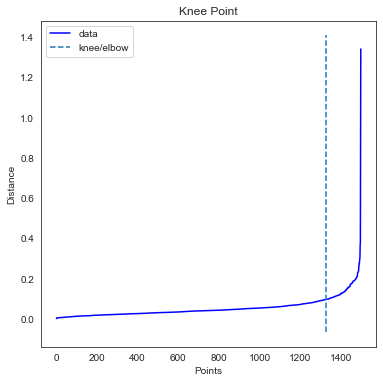

In [80]:
neighbors = NearestNeighbors(n_neighbors=6)
n_neighbors = neighbors.fit(X_aniso)
d, i = n_neighbors.kneighbors(X_aniso)
d = np.sort(d, axis=0)[:,1]
knee = KneeLocator(np.arange(len(d)), d, curve='convex', direction='increasing', interp_method='polynomial')
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")


<div dir=rtl >
<h1>تعیین MinPts</h1>

در مرحله قبل برای تعیین اپسیلون بهینه  مقدار MinPts را نیز مشخص کردیم. اما لزوما با آن مقدار  بهترین خوشه‌بندی را نخواهیم داشت.

<font color='Green'> پرسش: در این مرحله با در نظر گرفتن اپسیلون بدست آمده و با آزمودن مقادیر مختلف برای  پارامتر MinPts، بهترین حالت برای خوشه‌بندی را با استفاده از رنگ‌بندی مناسب رسم کنید. 

</div>




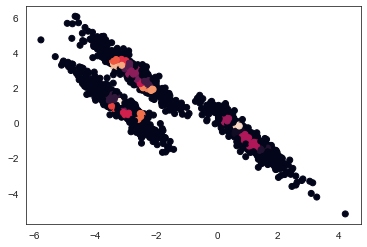

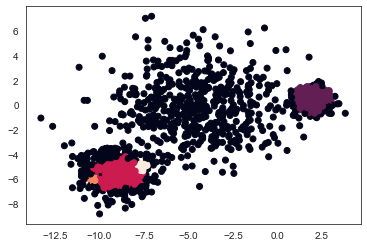

In [81]:
db = DBSCAN(eps=0.1, min_samples=10).fit(X_aniso)
labels = db.labels_
plt.scatter(X_aniso[:,0], X_aniso[:,1], c=db.labels_)
plt.figure()
db_varied = DBSCAN(eps=0.25, min_samples=10).fit(X_varied)
labels_varied = db_varied.labels_
plt.scatter(X_varied[:,0], X_varied[:,1], c=labels_varied)

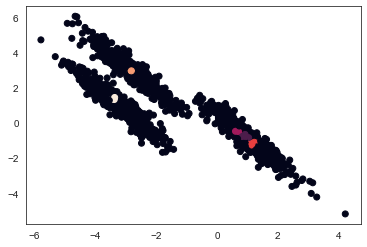

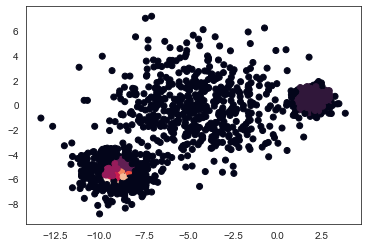

In [82]:
db2 = DBSCAN(eps=0.1, min_samples=15).fit(X_aniso)
labels2 = db2.labels_
plt.scatter(X_aniso[:,0], X_aniso[:,1], c=db2.labels_)
plt.figure()
db_varied2 = DBSCAN(eps=0.25, min_samples=15).fit(X_varied)
labels_varied2 = db_varied2.labels_
plt.scatter(X_varied[:,0], X_varied[:,1], c=labels_varied2)

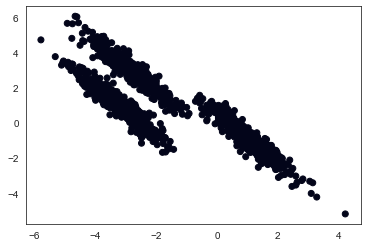

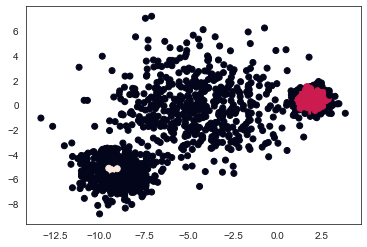

In [83]:
db3 = DBSCAN(eps=0.1, min_samples=20).fit(X_aniso)
labels3 = db3.labels_
plt.scatter(X_aniso[:,0], X_aniso[:,1], c=db3.labels_)
plt.figure()
db_varied3 = DBSCAN(eps=0.25, min_samples=20).fit(X_varied)
labels_varied3 = db_varied3.labels_
plt.scatter(X_varied[:,0], X_varied[:,1], c=labels_varied3)



<div dir=rtl >
<h1>بررسی نتایج</h1>


<font color='Green'> پرسش: خوشه‌های حاصل از اعمال دو الگوریتم k-means و DBSCAN بر روی این دو مجموعه داده را با یکدیگر مقایسه کنید. چه نتیجه‌ای می‌گیرید؟ 

<font color='Red'>
الگوریتم kmeans زمانی عملکرد مناسبی دارد که داده‌ها جداپذیر خطی باشند، اما در صورتی که خوشه‌ها یکی دیگری را شامل شود، آنگاه الگوریتم kmeans عملکرد مناسبی نخواهد داشت و باید از روش‌های density-based مانند dbscan استفاده کرد، همچنین در dbscan داده‌ها می‌توانند به هیچ خوشه‌ای تعلق نداشته باشند که در اینصورت به آن‌ها outlier گوییم. 
<font>
</div>


